# Pymaceuticals Inc.
---

### Analysis

The results shown here based on the analysis on the most recent animal study allows us to reach some of the following top-level conclusion.

First thing that immediately stands out looking at the box plot showing the distribution of the tumor volume for each treatment group is the effectiveness of the four drugs.  Capomulin and Ramicane seems to show the most promise as these have the lowest final tumor volumes.  On the other hand, Infubinol and Ceftamin final tumor volumes were much higher.   The line plot of tumor volume vs. time point for a single mouse treated with Capomulin further demonstrate its effectiveness.  As days went by the tumor volume decreased.

By analyzing the scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin one can assume that higher weight is correlated to higher tumor volumes.  This assumption is supported by a correlation value of .84.  This number shows a positive linear relationship between weight and tumor volume.  Lowering and maintain low weight can lead to the effectiveness of Capomulin.

Focusing research and study of Capomulin as a treatment would be a good path forward based on the results of the data that was analyzed.

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_complete = pd.merge(study_results,mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])


# Display the data table for preview
data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count = len(data_complete["Mouse ID"].unique())
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mouse_duplicate = data_complete[data_complete.duplicated(subset=['Mouse ID','Timepoint'])]
mouse_duplicate["Mouse ID"].unique()


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_data = data_complete[(data_complete['Mouse ID'] == mouse_duplicate["Mouse ID"].unique()[0])]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_complete = data_complete[(data_complete['Mouse ID'] != mouse_duplicate["Mouse ID"].unique()[0])]
clean_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = len(clean_data_complete["Mouse ID"].unique())
clean_mouse_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

mean = clean_data_complete.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean() 
median = clean_data_complete.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
variance = clean_data_complete.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
standard_deviation = clean_data_complete.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
SEM = clean_data_complete.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

summary_regimen = pd.DataFrame({"Mean Tumor Volume":mean,
                                "Median Tumor Volume": median,
                                "Tumor Volume Variance": variance,
                                "Tumor Volume Std. Dev.": standard_deviation,
                                "Tumor Volume Std. Err.": SEM})
summary_regimen

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_regimen_agg =  clean_data_complete.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean','median','var','std','sem']})
summary_regimen_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

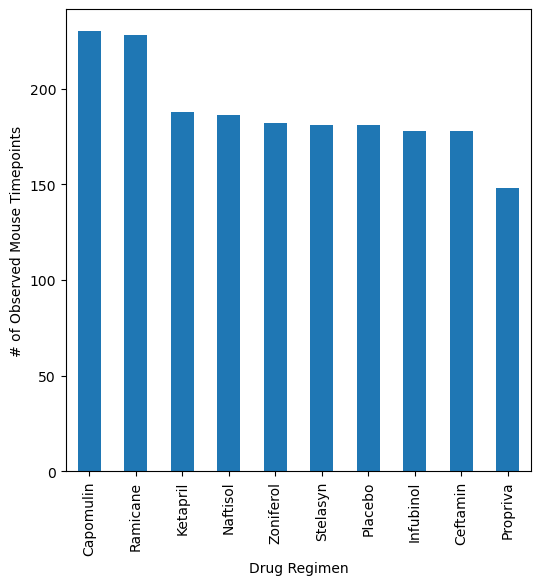

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count_drug_regimen = clean_data_complete['Drug Regimen'].value_counts().sort_values(ascending=False)
count_chart = count_drug_regimen.plot(kind='bar', figsize=(6,6))

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("# of Observed Mouse Timepoints")

plt.show()

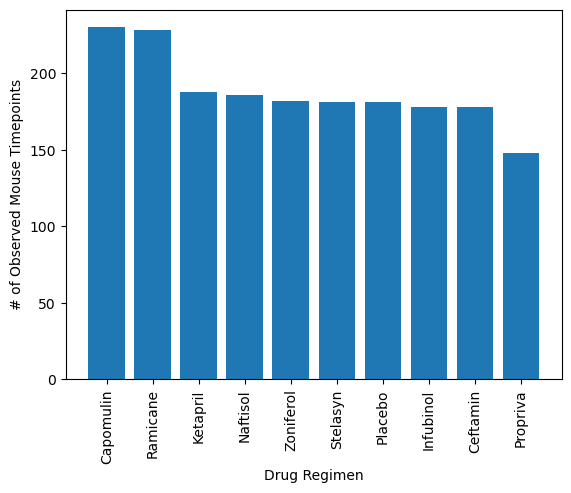

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(count_drug_regimen.index.values,count_drug_regimen.values)

#plt.bar(clean_data_complete['Drug Regimen'].unique(),clean_data_complete['Drug Regimen'].value_counts())
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()



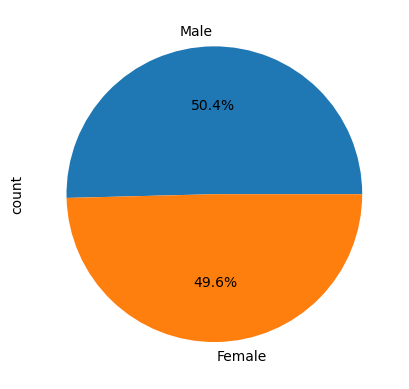

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_count = clean_data_complete.groupby('Sex')['Mouse ID'].nunique().sort_values(ascending=False)

# Make the pie chart
gender_count.plot(kind='pie',autopct="%1.1f%%")
plt.ylabel("count")
plt.show()



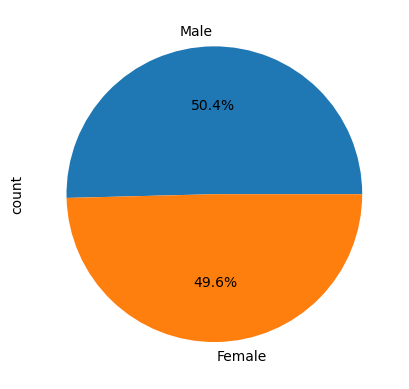

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_count = clean_data_complete.groupby('Sex')['Mouse ID'].nunique().sort_values(ascending=False)

# Make the pie chart
plt.pie(gender_count,autopct="%1.1f%%",labels=gender_count.index.values)
plt.ylabel("count")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_df= clean_data_complete.groupby(['Mouse ID']).max()['Timepoint']

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
data_merge = pd.merge(greatest_df, clean_data_complete, on=["Mouse ID", "Timepoint"])


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ["Capomulin","Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = [] 


# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments_list:
     # Locate the rows which contain mice on each drug and get the tumor volumes
     Current_Drug = data_merge.loc[data_merge["Drug Regimen"] == treatment]
     cd = Current_Drug["Tumor Volume (mm3)"]
     quartiles = cd.quantile([.25,.5,.75])
     lowerq = quartiles[0.25]
     upperq = quartiles[0.75]
     iqr = upperq-lowerq
     quartiles
     lower_bound = lowerq - (1.5*iqr)
     upper_bound = upperq + (1.5*iqr)

     # add subset
     Current_Drug_vol = Current_Drug.loc[:,"Tumor Volume (mm3)"]
     tumor_vol_data.append(Current_Drug_vol)

     # Determine outliers using upper and lower bounds
     outlier_occupancy = Current_Drug.loc[(Current_Drug['Tumor Volume (mm3)'] < lower_bound) | (Current_Drug['Tumor Volume (mm3)'] > upper_bound),"Tumor Volume (mm3)"]
     print(f"{treatment}'s potential outliers: {outlier_occupancy}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


C:\Users\jesus\AppData\Local\Temp\ipykernel_24080\1608082080.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(treatments_list)


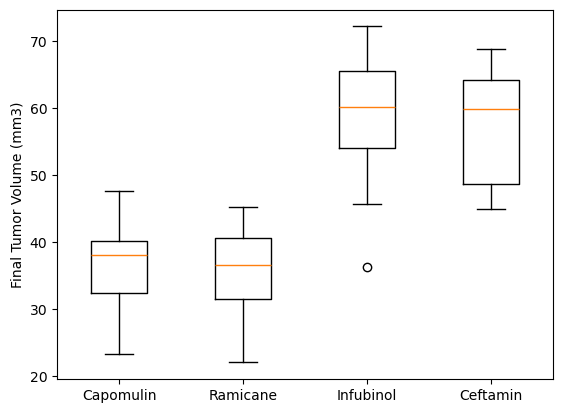

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xticklabels(treatments_list)
ax1.boxplot(tumor_vol_data)
plt.show()

## Line and Scatter Plots

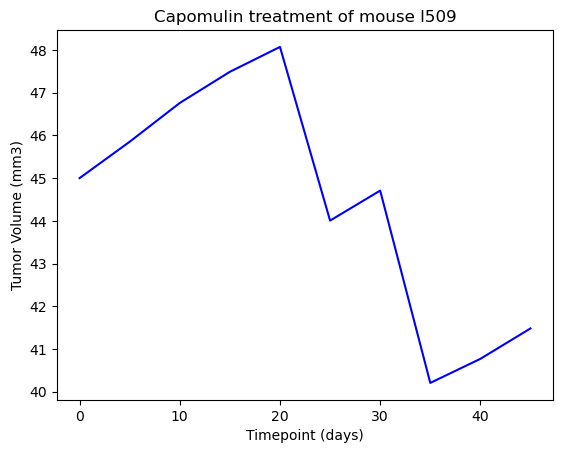

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_l509 = clean_data_complete.loc[clean_data_complete["Mouse ID"] == 'l509', ["Timepoint","Tumor Volume (mm3)"]]
plt.plot(mouse_l509["Timepoint"], mouse_l509["Tumor Volume (mm3)"], color="blue" )
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

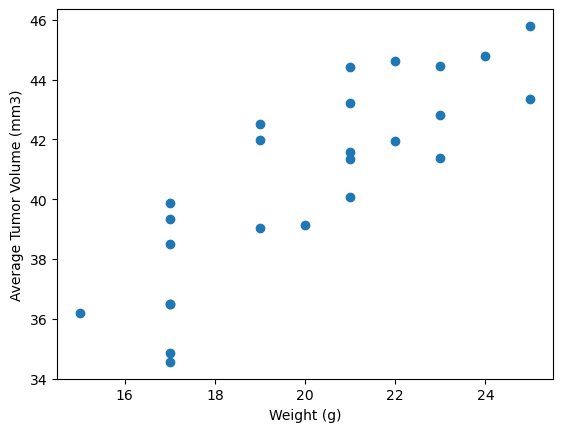

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_regimen = clean_data_complete.loc[clean_data_complete["Drug Regimen"] == 'Capomulin', ["Mouse ID","Weight (g)","Tumor Volume (mm3)"]]

x=Capomulin_regimen.groupby("Mouse ID")["Weight (g)"].mean()
y=Capomulin_regimen.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

plt.scatter(x, y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84


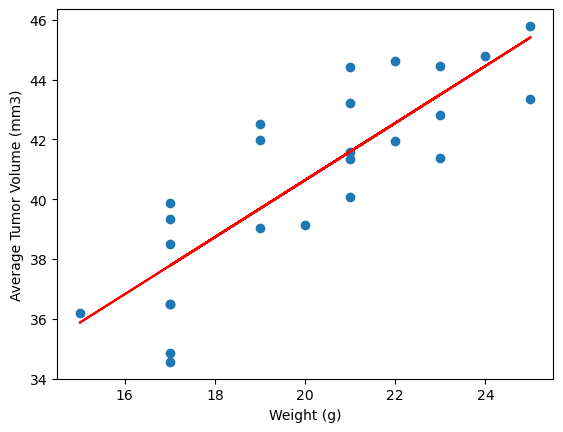

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(x,y)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.scatter(x, y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.show()
